# $$ Internet~users ~ Data$$

# Problem Statement:

A Predictive Analysis approach to predict Churn using various Machine Learning Algorithm.

# Importing Necessary librarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Datasets
media = pd.read_csv('Internetusersdata.csv')
media.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenureMonth,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#                     About Dataset

         
The dataset is used to predict Churn based on the input parameter like InternetService,gender,Techsupport
              



- **customerID**      - Unique Identifier

- **gender**          - Male or Female

- **SeniorCitizen**   - yes or no	

- **Partner**         - whether the person is single or having a partner

- **Dependents**      - yes or no

- **tenureMonth**     - monthly or quaterly

- **PhoneService**    - yes or no

- **MultipleLine**    - There are any multiple lines
                       * Yes 
                       * No 
                       * No phone service

- **InternetServic**   - what kind of Internet service is using
                      * Fibre optic 
                      * Dsl
                      * No
                      
- **OnlineSecurity**   - service is available 
                       * Yes 
                       * No
                       * No internet service

- **DeviceProtection**    - service is available 
                       * Yes 
                       * No
                       * No internet service
	

- **TechSupport**        - service is available 
                       * Yes 
                       * No
                       * No internet service

- **StreamingTV**	    - service is available 
                       * Yes 
                       * No
                       * No internet service

- **StreamingMovie**   - service is available 
                       * Yes 
                       * No
                       * No internet service


- **Contract**       - Type of contract
                     * Month to Month
                     * One year
                     * Two year
                     
- **PaperlessBilling**  - Yes or No

- **PaymentMethod**    -Modes of Payment
                      * Electronic check
                      * Mailed check
                      * Bank transfer(automatic)
                      * Credit card(automatic)
                      
- **MonthlyCharges**    - Amount paid monthly   

- **TotalCharges**      - Total amount paid

- **Churn**             - Yes or No

# Inspecting the Dataframe

In [3]:
# see the head of our dataset
media.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenureMonth,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# check the dimension of the dataframe
media.shape

(4999, 21)

In [5]:
# look at the statistical of the dataframe
media.describe()

,SeniorCitizen,tenureMonth,MonthlyCharges
count,4999.000000,4999.000000,4999.000000
mean,0.159632,32.260852,64.790788
std,0.366301,24.636874,30.138192
min,0.000000,0.000000,18.250000
25%,0.000000,8.000000,35.500000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.500000,89.950000
max,1.000000,72.000000,118.750000


The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

# Data Cleaning

In [6]:
# see the type of each column
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4999 non-null   object 
 1   gender            4999 non-null   object 
 2   SeniorCitizen     4999 non-null   int64  
 3   Partner           4999 non-null   object 
 4   Dependents        4999 non-null   object 
 5   tenureMonth       4999 non-null   int64  
 6   PhoneService      4999 non-null   object 
 7   MultipleLines     4999 non-null   object 
 8   InternetService   4999 non-null   object 
 9   OnlineSecurity    4999 non-null   object 
 10  OnlineBackup      4999 non-null   object 
 11  DeviceProtection  4999 non-null   object 
 12  TechSupport       4999 non-null   object 
 13  StreamingTV       4999 non-null   object 
 14  StreamingMovies   4999 non-null   object 
 15  Contract          4999 non-null   object 
 16  PaperlessBilling  4999 non-null   object 


In [7]:
# convert str to float

media['TotalCharges'] = pd.to_numeric(media['TotalCharges'], errors = 'coerce')

In [8]:
# see the type
media.dropna(inplace = True)

In [9]:
# see the type of each column
media.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4991 entries, 0 to 4998
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4991 non-null   object 
 1   gender            4991 non-null   object 
 2   SeniorCitizen     4991 non-null   int64  
 3   Partner           4991 non-null   object 
 4   Dependents        4991 non-null   object 
 5   tenureMonth       4991 non-null   int64  
 6   PhoneService      4991 non-null   object 
 7   MultipleLines     4991 non-null   object 
 8   InternetService   4991 non-null   object 
 9   OnlineSecurity    4991 non-null   object 
 10  OnlineBackup      4991 non-null   object 
 11  DeviceProtection  4991 non-null   object 
 12  TechSupport       4991 non-null   object 
 13  StreamingTV       4991 non-null   object 
 14  StreamingMovies   4991 non-null   object 
 15  Contract          4991 non-null   object 
 16  PaperlessBilling  4991 non-null   object 


Data Preprocessing
Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

The concepts that I will cover in this article are

 1.Handling Null Values

 2.Feature Scaling

 3.Handling Categorical Variables

# 1. Handling Null Values :

In any real-world dataset, there are always few null values. It doesn’t    really matter whether it is a regression, classification or any other kind of problem, no model can handle these NULL or NaN values on its own so we need to intervene.


 **In python NULL is reprsented with NaN. So don’t get confused between these two,they can be used interchangably.**

In [10]:
#Checking for NULLS in the data
media.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenureMonth         0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

So we can see our data does not have any null values but in case we have missing values, we can remove the data as well.¶

In [11]:
# look at the statistical of the dataframe
media.describe()

,SeniorCitizen,tenureMonth,MonthlyCharges,TotalCharges
count,4991.000000,4991.000000,4991.000000,4991.000000
mean,0.159888,32.312563,64.834402,2275.557844
std,0.366539,24.622702,30.130489,2268.976112
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.550000,388.250000
50%,0.000000,29.000000,70.450000,1397.650000
75%,0.000000,56.000000,89.950000,3760.525000
max,1.000000,72.000000,118.750000,8684.800000


# 

# Exploratory Data Analytics

In [12]:
media.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenureMonth', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

𝑆𝑝𝑙𝑖𝑡𝑖𝑛𝑔 𝑡ℎ𝑒 𝑐𝑜𝑙𝑢𝑚𝑛𝑠 𝑖𝑛𝑡𝑜 𝑡𝑤𝑜 𝑠𝑒𝑝𝑎𝑟𝑎𝑡𝑒 𝑙𝑖𝑠𝑡

In [13]:
continuous = ['SenioCitizen', 'tenureMonth', 'MonthlyCharges', 'TotalCharges']
categorical = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'Churn']

**To understand more about these columns we need to plot some graphs, as we know that continuous variable are best understood by box plot and categorical variables are best represented by count plots, so ploting them:**

#         **Categorical ~ Variables**



### Value Counts:

In [14]:
for i in categorical:
    print("="*30)
    print(" "f"{i.upper()}"+" ")
    print(media[i].value_counts())

 GENDER 
Male      2529
Female    2462
Name: gender, dtype: int64
 PARTNER 
No     2593
Yes    2398
Name: Partner, dtype: int64
 DEPENDENTS 
No     3521
Yes    1470
Name: Dependents, dtype: int64
 PHONESERVICE 
Yes    4531
No      460
Name: PhoneService, dtype: int64
 MULTIPLELINES 
No                  2398
Yes                 2133
No phone service     460
Name: MultipleLines, dtype: int64
 INTERNETSERVICE 
Fiber optic    2191
DSL            1709
No             1091
Name: InternetService, dtype: int64
 ONLINESECURITY 
No                     2469
Yes                    1431
No internet service    1091
Name: OnlineSecurity, dtype: int64
 ONLINEBACKUP 
No                     2176
Yes                    1724
No internet service    1091
Name: OnlineBackup, dtype: int64
 DEVICEPROTECTION 
No                     2172
Yes                    1728
No internet service    1091
Name: DeviceProtection, dtype: int64
 TECHSUPPORT 
No                     2476
Yes                    1424
No internet ser

# Count Plot

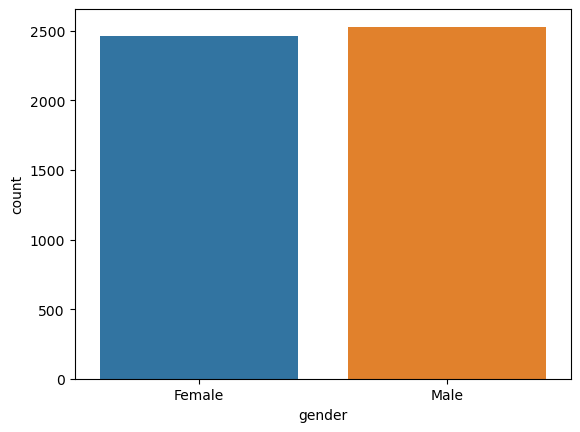

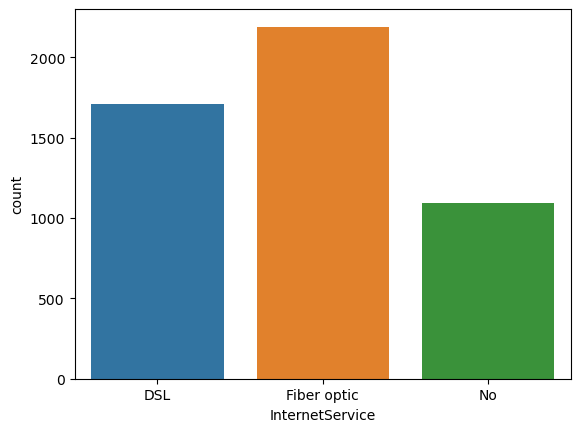

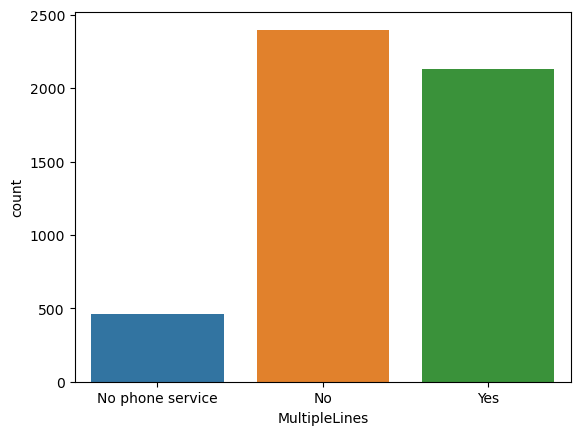

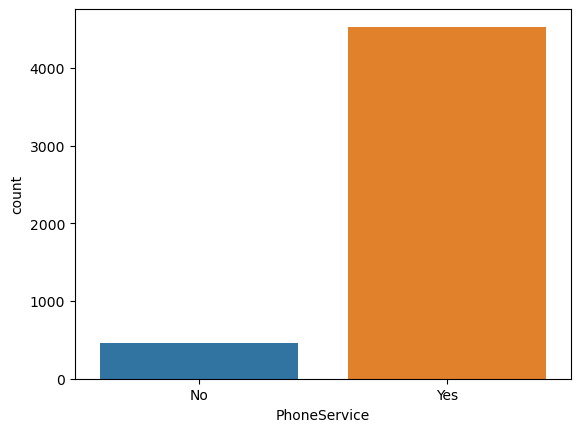

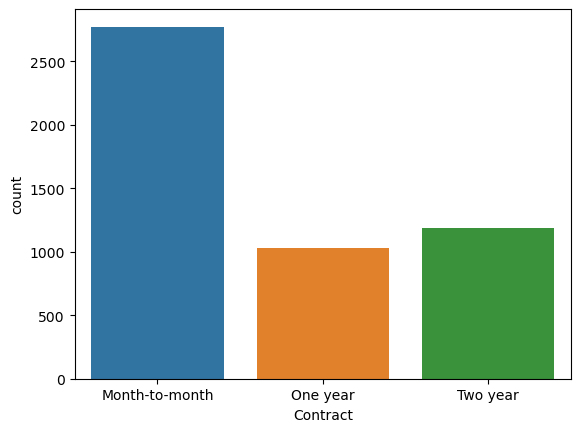

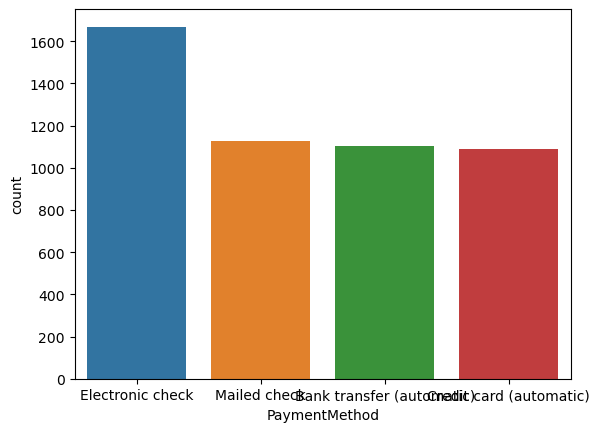

In [15]:
categorical = ['gender','InternetService', 'MultipleLines', 'PhoneService', 'Contract', 'PaymentMethod']
 
for i in categorical:
    sns.countplot(media[i])
    plt.show()

# Continuous Variables

## Box plot

<AxesSubplot:xlabel='TotalCharges'>

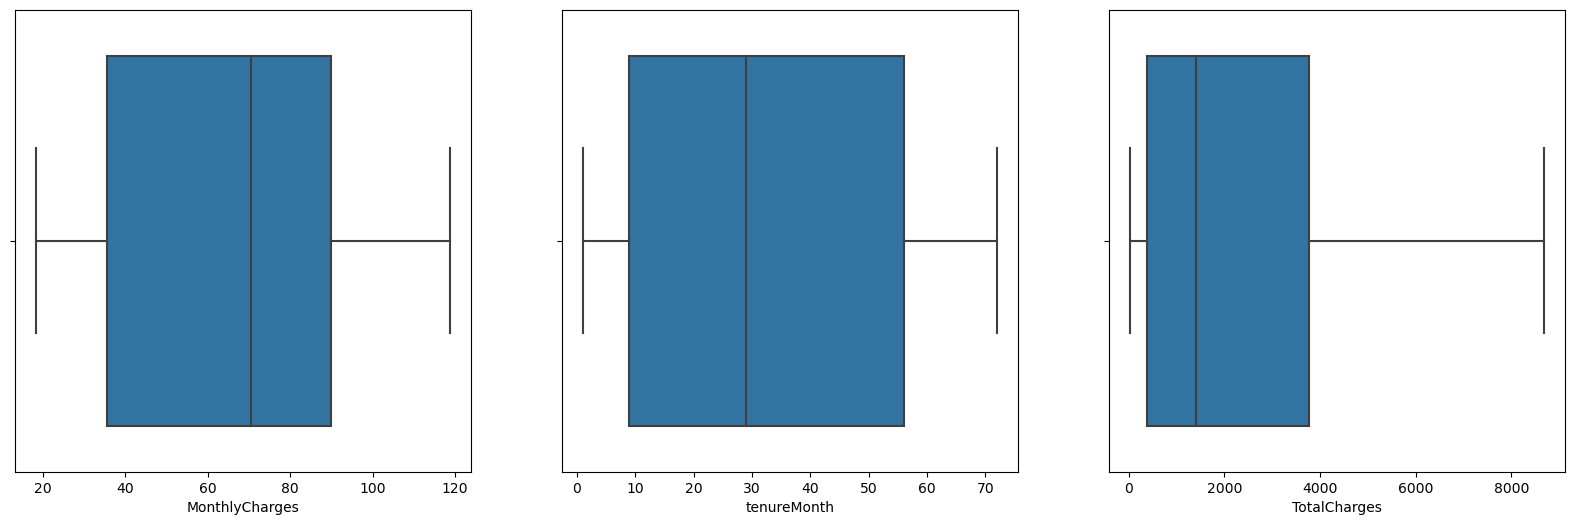

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(x=media.MonthlyCharges)
plt.subplot(1,3,2)
sns.boxplot(x=media.tenureMonth)
plt.subplot(1,3,3)
sns.boxplot(x=media.TotalCharges)

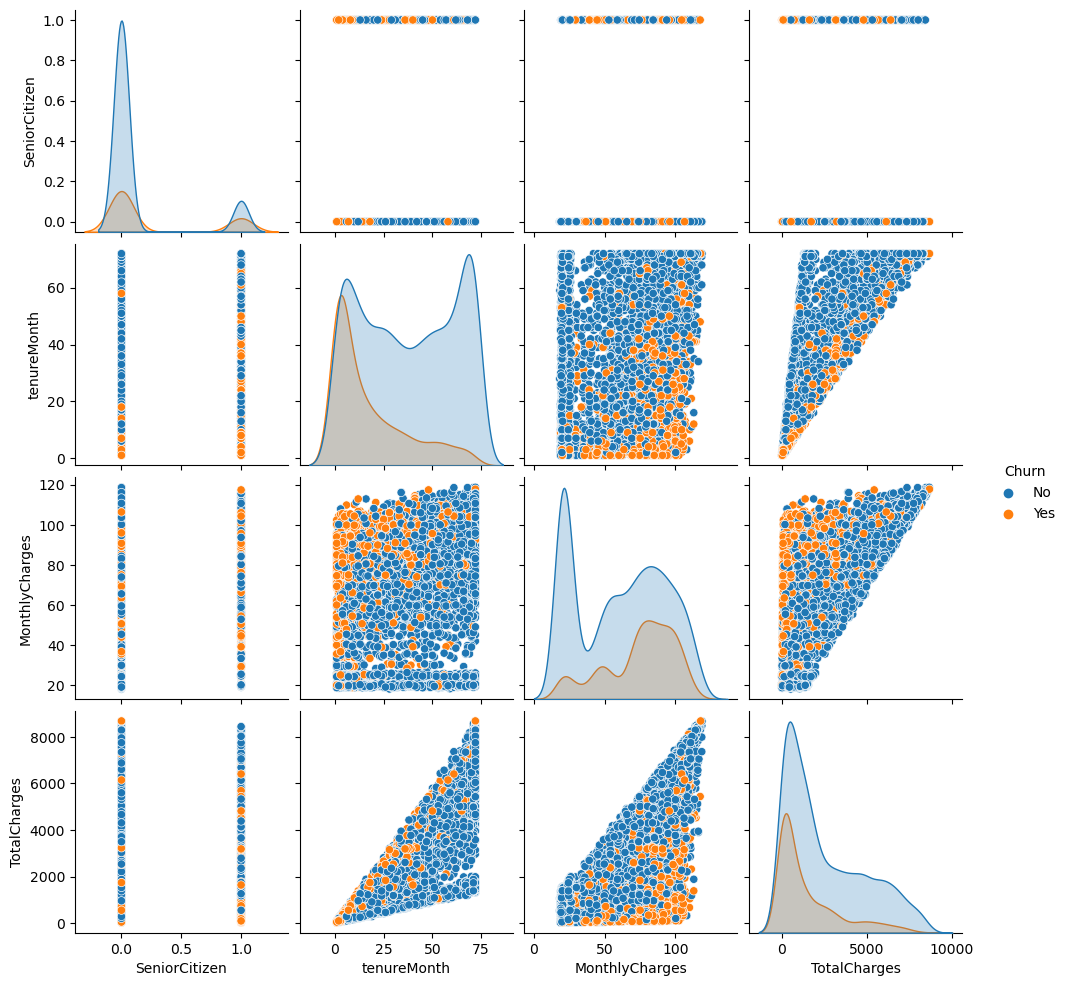

In [17]:
sns.pairplot(media,hue='Churn')
plt.savefig('pairplot')
plt.show()

## HEAT MAP

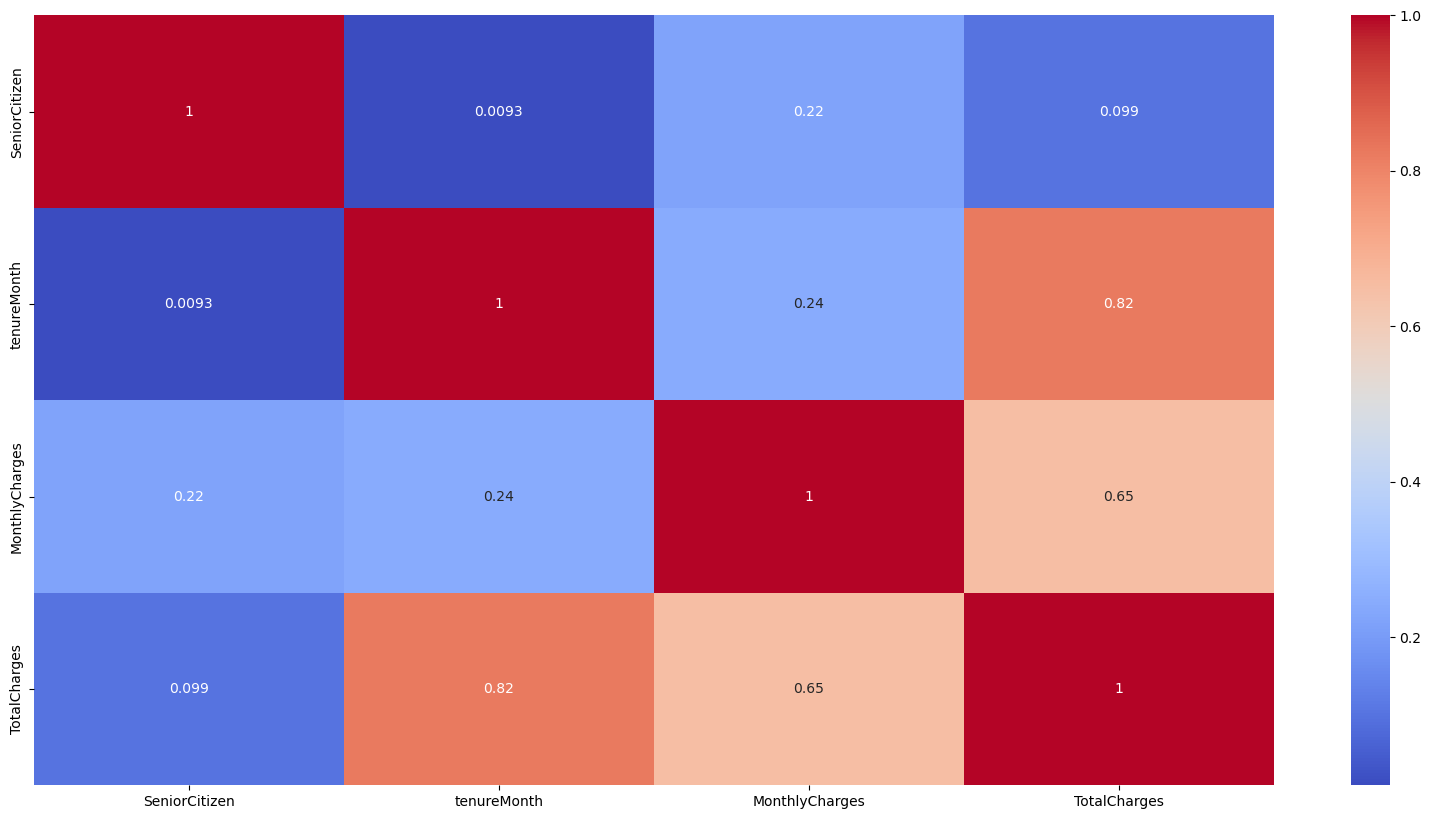

In [18]:
plt.figure(figsize = (20,10))
sns.heatmap(media.corr(),cmap = "coolwarm", annot = True)
plt.show()

# DATA PREPROCESSING

#### $$FEATURE~Engineering$$

In [19]:
#Creating a dummy variable for some of the categorical variable and dropping  the first one.
dummy = pd.get_dummies(media[['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']], drop_first = True)

#Adding the results to the master dataframe
media = pd.concat([media, dummy], axis=1)

#To display maximum rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
media.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenureMonth,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,1


In [20]:
#putting feature variable to x

media = media.drop(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'],1)
media.head()

,SeniorCitizen,tenureMonth,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,0,1,0,0,1
1,0,34,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.50,No,1,0,0,1,0
2,0,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,1,0,0,1,1
3,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,0
4,0,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,0,0,0,1,1


In [21]:
#Creating a dummy variable for the some of the categorical variable and dropping the first one.

dummy = pd.get_dummies(media[['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']], drop_first = True)

#Adding the result to the master dataframe
media = pd.concat([media, dummy], axis=1)

#To display maximum rows and Columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
media.head()

,SeniorCitizen,tenureMonth,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,34,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.50,No,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
media= media.drop(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)
media.head()

,SeniorCitizen,tenureMonth,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,Month-to-month,Electronic check,29.85,29.85,No,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,34,One year,Mailed check,56.95,1889.50,No,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,2,Month-to-month,Mailed check,53.85,108.15,Yes,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,45,One year,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,2,Month-to-month,Electronic check,70.70,151.65,Yes,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
varlist = ['Churn']

def binary_map(x):
    return x.map({'Yes':1 , 'No': 0})

media[varlist] = media[varlist].apply(binary_map)
media.head()

,SeniorCitizen,tenureMonth,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,Month-to-month,Electronic check,29.85,29.85,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,34,One year,Mailed check,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,2,Month-to-month,Mailed check,53.85,108.15,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,45,One year,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,2,Month-to-month,Electronic check,70.70,151.65,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
pm=pd.get_dummies(media['PaymentMethod'],prefix='PaymentMethod')
pm1=pm.drop(['PaymentMethod_Mailed check'],1)
media=pd.concat([media,pm1],axis = 1)
media.head()

,SeniorCitizen,tenureMonth,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0,1,Month-to-month,Electronic check,29.85,29.85,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,34,One year,Mailed check,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,2,Month-to-month,Mailed check,53.85,108.15,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,45,One year,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,2,Month-to-month,Electronic check,70.70,151.65,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
#Creating a dummy variable for some of the categorical variable and dropping the first one
ct=pd.get_dummies(media['Contract'],prefix='Contract')
ct1=ct.drop(['Contract_Two year'],1)
#Adding the result to the master dataframe
media=pd.concat([media,ct1],axis = 1)
media.head()

,SeniorCitizen,tenureMonth,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Contract_Month-to-month,Contract_One year
0,0,1,Month-to-month,Electronic check,29.85,29.85,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,34,One year,Mailed check,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,2,Month-to-month,Mailed check,53.85,108.15,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,45,One year,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
4,0,2,Month-to-month,Electronic check,70.70,151.65,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [26]:
#Putting response variable  to x
media = media.drop(['Contract','PaymentMethod'],1)
media.head()

,SeniorCitizen,tenureMonth,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Contract_Month-to-month,Contract_One year
0,0,1,29.85,29.85,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,45,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
4,0,2,70.70,151.65,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


# Machine Learning Model

In [27]:
#test-train Split
from sklearn.model_selection import train_test_split

# Separating Target Variables from other features

In [28]:
#putting feature variable to x
X = media.drop(['Churn'], axis =1)

X.head()

,SeniorCitizen,tenureMonth,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Contract_Month-to-month,Contract_One year
0,0,1,29.85,29.85,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
4,0,2,70.70,151.65,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [29]:
#putting response variable to y
y = media['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# Separating Target Variables from other features:

In [30]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [31]:
#to check the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3493, 30), (1498, 30), (3493,), (1498,))

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

X_train[['SeniorCitizen','tenureMonth', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['SeniorCitizen', 'tenureMonth', 'MonthlyCharges', 'TotalCharges']])

X_train.head()

,SeniorCitizen,tenureMonth,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Contract_Month-to-month,Contract_One year
1730,0.0,0.000000,0.413930,0.004737,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4466,0.0,0.042254,0.613433,0.035253,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
31,1.0,0.014085,0.768657,0.018792,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0
1631,1.0,0.225352,0.667662,0.166703,0,1,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1142,1.0,0.140845,0.566667,0.087295,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [34]:
X_test.head()

,SeniorCitizen,tenureMonth,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Contract_Month-to-month,Contract_One year
3110,0,1,19.10,19.10,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
2001,0,5,20.15,117.95,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
423,0,44,25.70,1110.50,1,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
4253,0,22,88.75,1885.15,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
1256,0,72,85.90,6110.75,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0


In [35]:
#Scalaer = MinMaxScaler()
X_test[['SeniorCitizen', 'tenureMonth', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_test[['SeniorCitizen', 'tenureMonth', 'MonthlyCharges', 'TotalCharges']])

X_test.head()

,SeniorCitizen,tenureMonth,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Contract_Month-to-month,Contract_One year
3110,0.0,0.000000,0.003541,0.000029,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
2001,0.0,0.056338,0.014163,0.011644,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
423,0.0,0.605634,0.070309,0.128269,1,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
4253,0.0,0.295775,0.708144,0.219290,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
1256,0.0,1.000000,0.679312,0.715797,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0


# MODEL BUILDING

### Logistic Regression

Logistic Regression  produce  Result in binary format which is used to predict the outcome of a Categorical dependent variable ,so the outcome Should be discrete/categorical such as :

example:- 0 or 1, Yes or No, True or False,High and Low

P(Y=1|X) or P(Y=0|X)

It calculates the probability of dependent variable Y, given independent variable X.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png">

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [38]:
#Training data is used for model building
lr.fit(X_train, y_train)

LogisticRegression()

In [39]:
#Testing data is used for prediction
y_pred_logreg = lr.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test, y_pred_logreg)

0.807743658210948

In [42]:
#Libraries for Validation of models
from sklearn.metrics import confusion_matrix

In [43]:
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
logistic_confusion_matrix

array([[1010,   98],
       [ 190,  200]], dtype=int64)

<AxesSubplot:>

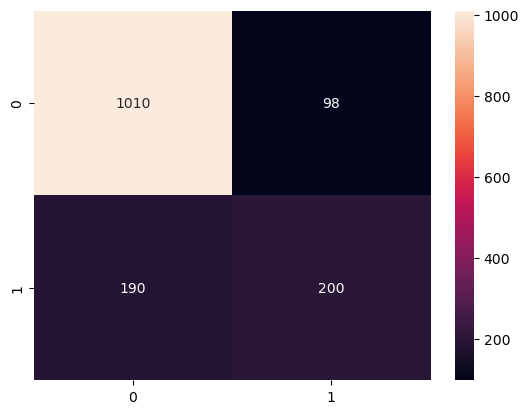

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred_logreg), annot = True, fmt = "d")

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

In [46]:
#Function for Logistic Regression create summary for logistic Regreesion

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='yellow', lw=2, linestyle='--')
    plt.plot([0,1], [0,1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate(sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    
def get_summary(y_test, y_pred_logreg):
    #confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred_logreg)
    TP = conf_mat[0, 0:1]
    FP = conf_mat[0, 1:2]
    FN = conf_mat[1, 0:1]
    TN = conf_mat[1, 1:2]
    
    accuracy = (TP + TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    fscore = (2 * recall * precision)/(recall + precision)
    auc = roc_auc_score(y_test, y_pred_logreg)
    
    
    print("Confusion Matrix:\n", conf_mat)
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision", precision)
    print("Sensitivity:", sensitivity)
    print("Specificity", specificity)
    print("F-score:", fscore)
    print("AUC:", auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
    plot_roc_curve(fpr,tpr)
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1010   98]
 [ 190  200]]
Accuracy: [0.80774366]
Recall: [0.84166667]
Precision [0.91155235]
Sensitivity: [0.84166667]
Specificity [0.67114094]
F-score: [0.87521664]
AUC: 0.7121864296954549
ROC curve:


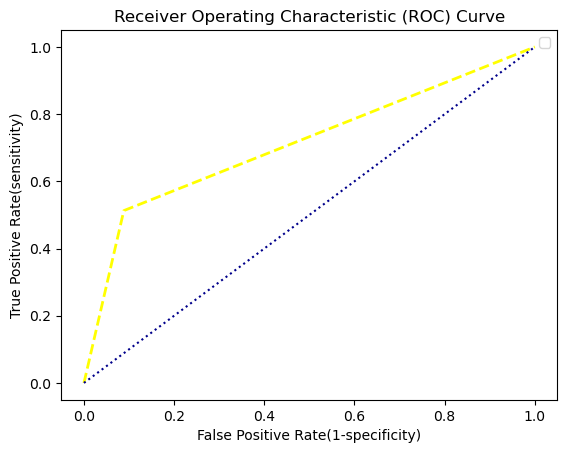

In [47]:
get_summary(y_test, y_pred_logreg)

# Support Vector Machine (SVM)

A support vector machine (SVM) uses algorithms to train and classify data within degrees of polarity, taking it to a degree beyond X/Y prediction. 

For a simple visual explanation, we’ll use two tags: red and blue, with two data features: X and Y, then train our classifier to output an X/Y coordinate as either red or blue.

<img src="https://monkeylearn.com/static/93a102a9b7b96d9047212e15b627724b/d8712/image4-3.webp" width=40%>

The SVM then assigns a hyperplane that best separates the tags. In two dimensions this is simply a line. Anything on one side of the line is red and anything on the other side is blue. In sentiment analysis, for example, this would be positive and negative.

In order to maximize machine learning, the best hyperplane is the one with the largest distance between each tag:

<img src="https://monkeylearn.com/static/e662f65502ffd24d3ee23c07efe88d9e/d8712/image3-2.webp" width=40%>

However, as data sets become more complex, it may not be possible to draw a single line to classify the data into two camps:

<img src="https://monkeylearn.com/static/5db2d9178789315ce9fa42f579c895a6/93a24/image2-3.webp" width=40%>

Using SVM, the more complex the data, the more accurate the predictor will become. Imagine the above in three dimensions, with a Z-axis added, so it becomes a circle.

Mapped back to two dimensions with the best hyperplane, it looks like this

<img src="https://monkeylearn.com/static/583405ebadf21c9691030ec4bb875e48/93a24/image6-2.webp" width=40%>

SVM allows for more accurate machine learning because it’s multidimensional.

We need to choose the best Kernel according to our need.
- The linear kernel is mostly preferred for text classification problems as it performs well for large datasets.
- Gaussian kernels tend to give good results when there is no additional information regarding data that is not available.
- Rbf kernel is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.
- Polynomial kernels give good results for problems where all the training data is normalized.


In [ ]:
from sklearn.svm import SVC 

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)


In [ ]:
y_pred_svc = svc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_svc)

In [ ]:
SVM_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
SVM_confusion_matrix

In [ ]:
sns.heatmap(SVM_confusion_matrix,annot=True)

In [ ]:
get_summary(y_test, y_pred_svc)

## NAIVE BAYES CLASSIFICATION


<img src="https://insightimi.files.wordpress.com/2020/04/unnamed-1.png">


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

In [ ]:
y_pred_gnb = gnb.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_gnb)

In [ ]:
gnb_confusion_matrix = confusion_matrix(y_test, y_pred_gnb)
gnb_confusion_matrix

In [ ]:
sns.heatmap(gnb_confusion_matrix,annot=True)

In [ ]:
get_summary(y_test, y_pred_gnb)

## K-NEAREST NEIGHBOUR

The optimal K value usually found is the square root of N, where N is the total number of samples

K-nearest neighbors (k-NN) is a pattern recognition algorithm that uses training datasets to find the k closest relatives in future examples.

When k-NN is used in classification, you calculate to place data within the category of its nearest neighbor. If k = 1, then it would be placed in the class nearest 1. K is classified by a plurality poll of its neighbors.



<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png">



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_knn)

In [ ]:
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_confusion_matrix

In [ ]:
sns.heatmap(knn_confusion_matrix,annot=True)

In [ ]:
get_summary(y_test, y_pred_knn)

## DECISION TREE

<img src="https://media.giphy.com/media/IyZM6HFe2zgrK/giphy.gif">

A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar. This creates categories within categories, allowing for organic classification with limited human supervision.





In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_test, y_test)

In [ ]:
y_pred_dtree= dtree.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_dtree)

In [ ]:
dtree_confusion_matrix = confusion_matrix(y_test, y_pred_dtree)
dtree_confusion_matrix

In [ ]:
sns.heatmap(dtree_confusion_matrix,annot=True)

In [ ]:
get_summary(y_test, y_pred_dtree)

## RANDOM FOREST

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).

<img src="https://miro.medium.com/max/5752/1*5dq_1hnqkboZTcKFfwbO9A.png" width=70%>

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds.




In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_test, y_test)

In [ ]:
y_pred_rfc = rfc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_rfc)

In [ ]:
RandomForest_confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
RandomForest_confusion_matrix

In [ ]:
sns.heatmap(RandomForest_confusion_matrix,annot=True)

In [ ]:
get_summary(y_test, y_pred_rfc)

## ACCURACY COMPARISON

In [ ]:
lx = ['Log Reg','SVM', 'GaussianNB','D Tree','KNN','Random Forest']
ly = [80.77,79.9,70.3,100,74.9,100]
plots = sns.barplot(x=lx,y=ly)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 2),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Algorithms", size=14)
 
# Setting the label for y-axis
plt.ylabel("Accuracy", size=14)
 
# Setting the title for the graph
plt.title("Accuracy Comparison",size=16)
 
# Finally showing the plot
plt.show()

## $$Insight$$
- DECISION TREE and RANDOM FOREST has the highest accuracy among all the models.
- Above TWO models doesn't miss-classifies any customers.